In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
digits = datasets.load_digits()


In [3]:
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

#### Print the shape of the images and the data keys

In [4]:
print(digits.images.shape)
print(digits.data.shape)


(1797, 8, 8)
(1797, 64)


#### Display the digit 1010

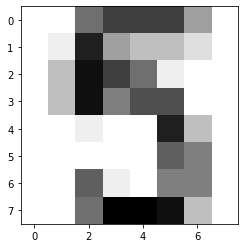

In [11]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')


#### Create the features required for training and testing for target arrays

In [12]:
x = digits.data
y = digits.target

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
knn = KNeighborsClassifier(n_neighbors=7)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
print(knn.score(x_test, y_test))

0.9833333333333333


In [18]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [20]:
# Loop over different values of k
for i, k in enumerate(neighbors):
# Setup a k-NN Classifier with k neighbors: knn  
  knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

train_accuracy[i] = knn.score(x_train, y_train)

test_accuracy[i] = knn.score(x_test, y_test)

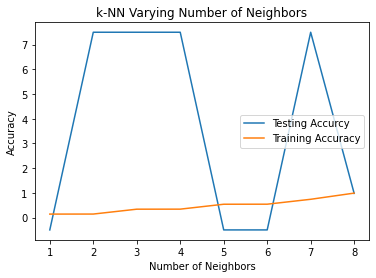

In [23]:
from prompt_toolkit.shortcuts.dialogs import Label
# Generate plot
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accurcy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()